In [52]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [53]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

inverse = True
remove_noise = True

thin = True
thin_intensity = 2

thick = False
thick_intensity = 3

#Binarization
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Noise Removal
def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

#Font Thinning
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=thin_intensity)
    image = cv2.bitwise_not(image)
    return (image)

#Font Thicking
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=thick_intensity)
    image = cv2.bitwise_not(image)
    return (image)


7A

9A

Lo



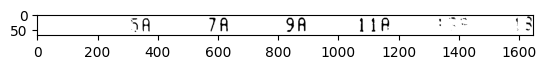

In [54]:
img = cv2.imread('Images/rotated_test.jpg')
img = grayscale(img)

if inverse:
    thresh, img = cv2.threshold(img, 210, 230, cv2.THRESH_BINARY_INV)
else:
    thresh, img = cv2.threshold(img, 210, 230, cv2.THRESH_BINARY)

if remove_noise:
    img = noise_removal(img)
    
if thin:
    img = thin_font(img)
    
if thick:
    img = thick_font(img)
    
plt.imshow(img,cmap='gray')
    
text = pytesseract.image_to_string(img)
print(text)